In [2]:
# To Test something new
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#



## http://benalexkeen.com/k-means-clustering-in-python/
## http://benalexkeen.com/k-nearest-neighbours-classification-in-python/
## http://localhost:8890/notebooks/05_support_vector_machines.ipynb

In [3]:


# df = pd.DataFrame({
#     'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
#     'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
# })

df = pd.DataFrame({
    'x': [ 1.19668401055, 0.474145274545, 0.988023729718, 0.797246611948, 1.04789832475,
          1.03990542498, 1.13121439413, 1.08631472615, 1.07469086981, 0.886032307624,
          0.951005023991, 0.895502975291, 0.942344827152, 0.889850355034, 0.904306850575,
          0.832311177949, 0.848557799234, 0.850324223389, 0.818293173811, 0.825828408838,
          0.814409638336, 0.830884974402, 0.806479318499, 0.868025405085, 0.826490721746,
          0.819360449611, 0.784248087493, 0.77378668056, 0.780893303154, 0.833886058189,
          0.835665801956, 0.807216713574, 0.85713096727, 0.819920784593, 0.876094440244,
          0.810860725014, 0.833822424004, 0.852943516185, 0.86318969487, 0.861077256139,
          0.839044665631, 0.848230047134, 0.803456373611, 0.886190059208, 0.8136859128,
          0.906654939073, 0.823151324409, 0.904461982258, 0.857844762578, 0.833229685205,
          0.853498938045, 0.826406362504, 0.871372621052, 0.85114098786, 0.905185365835,
          0.858026607272, 0.927293357662, 0.864992778657, 0.9202683581, 0.882267575119],
    'y': [ 33.941962979, 51.7040138507, 54.5014062128, 44.7791495107, 45.4768729094,
          51.4634066604, 53.1647266698, 52.0242608654, 49.8410838062, 52.4404296488,
          49.7568045335, 51.0437531458, 55.0366559275, 48.4305493425, 51.6633971256,
          48.5705835575, 52.0303603369, 49.9504396542, 49.452573097, 47.733086729,
          48.4680739933, 47.5676510841, 49.6969007239, 49.9506607586, 49.7524990932,
          52.7017157847, 49.4347401694, 52.8211852884, 50.541103064, 52.8787516334,
          49.9229344064, 52.1516101295, 50.7927303391, 53.3072043266, 50.6032946991,
          52.8262708593, 53.8503517154, 51.9943401614, 53.9407780828, 51.666821983,
          53.7023249209, 51.0239048842, 52.502597254, 50.9886969845, 52.5049492588,
          51.2795753409, 53.1496752244, 51.2199770187, 52.507491852, 54.5219397,
          53.3698649575, 55.4663640536, 54.4011857666, 56.5781060527, 54.4077194186,
          55.7548587734, 54.1200246366, 55.5813974235, 53.6836491307, 54.7599768069]
})





from sklearn.cluster import KMeans

## find best cluster
M_max = 2
kmeans = KMeans(n_clusters=M_max)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

dt_mean = np.mean(df['x'])
phi_mean = np.mean(df['y'])
print(dt_mean,phi_mean)

cluster_num=0
## summed Variance of the individual clusters

sigma_2 = np.mean(df['x'][np.where(labels==cluster_num)[0]]) \
         + np.var(df['y'][np.where(labels==cluster_num)[0]]) \
          + np.var(df['x'][np.where(labels==cluster_num+1)[0]]) \
          + np.var(df['y'][np.where(labels==cluster_num+1)[0]])
print(sigma_2)    

## Variance as if it where 1 
sigma_1 = np.var(df['x'][np.where(((labels>=cluster_num) & \
               labels<=cluster_num+2))[0]])+np.var(df['y'][np.where(((labels>=cluster_num) & \
                                 labels<=cluster_num+2))[0]])
print(sigma_1)   
# as_one = df['x'][np.where(labels==cluster_num)][0],df['x'][np.where(labels==cluster_num+1)][0]
# print(as_one)                 


[0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[ 0.88531389 47.80744508]
 [ 0.86657986 52.94588019]]
0.8718878359067668 51.48999023861334
17.489382269790127
11.079955255962378


In [5]:
## Vorgehen
## split into M clusters
## check if they can be combined with the criteria


# cluster_num = 0

# sigma_2  = np.sum((df['x'][np.where(labels==cluster_num)[0]]-centroids[cluster_num,0])**2
#                  +(df['y'][np.where(labels==cluster_num)[0]]-centroids[cluster_num,1])**2)+np.sum((df['x'][np.where(labels==cluster_num+1)[0]]-centroids[cluster_num+1,0])**2
#                  +(df['y'][np.where(labels==cluster_num+1)[0]]-centroids[cluster_num+1,1])**2)


# sigma_1 = np.var(df['x'][np.where(labels==cluster_num)[0])


## comparing the variance from 2 clusters with the variance of as if it is 1 cluster
sigma_2 = sigma_1

critical_val = 3.2
dof = 2
check_critical_val = (1- sigma_2/sigma_1 - 2/(np.pi*dof))* \
np.sqrt(len(df['x'][np.where(labels==cluster_num)[0]])*dof/(2*(1-8/(np.pi**2*dof))))

print(check_critical_val)

## if yes then combine and update labels and compare again




-1.7018451637857666


In [6]:
## just get the cluster with minimum variance in both directions



for cluster_num in range(0,3):
    
#    print(np.mean(df['x'][np.where(labels==cluster_num)[0]]),np.var(df['x'][np.where(labels==cluster_num)[0]]))
#    print(np.mean(df['y'][np.where(labels==cluster_num)[0]]),np.var(df['y'][np.where(labels==cluster_num)[0]]))    
    
    ## find best variance within clusters and choose the one with lowest
    sigma_c = (np.var(df['x'][np.where(labels==cluster_num)[0]])+np.var(df['y'][np.where(labels==cluster_num)[0]]))/len(df['x'][np.where(labels==cluster_num)[0]])
    sigma_d = np.sqrt(1/np.var(df['x'][np.where(labels==cluster_num)[0]]))+np.sqrt(1/np.var(df['y'][np.where(labels==cluster_num)[0]]))
    
    print(sigma_c,sigma_d)

## plot the individual cluster variances    
plt.subplot(1,2,1)    
cluster_num=0
plt.errorbar(df['x'][np.where(labels==cluster_num)[0]],
             df['y'][np.where(labels==cluster_num)[0]],
             xerr=np.std(df['x'][np.where(labels==cluster_num)[0]]),
             yerr=np.std(df['y'][np.where(labels==cluster_num)[0]]),fmt='o', ecolor='r', capthick=2)

plt.subplot(1,2,2)    
cluster_num=1
plt.errorbar(df['x'][np.where(labels==cluster_num)[0]],
             df['y'][np.where(labels==cluster_num)[0]],
             xerr=np.std(df['x'][np.where(labels==cluster_num)[0]]),
             yerr=np.std(df['y'][np.where(labels==cluster_num)[0]]),fmt='o', ecolor='r', capthick=2)



plt.show()

## and then select the centroid


0.8402853924094132 9.176582937760934
0.05422808680153797 11.291505055808884


ZeroDivisionError: float division by zero



We get the exact same result, albeit with the colours in a different order.

Some things to take note of though:

    k-means clustering is very sensitive to scale due to its reliance on Euclidean distance so be sure to normalize data if there are likely to be scaling problems.
    If there are some symmetries in your data, some of the labels may be mis-labelled
    It is recommended to do the same k-means with different initial centroids and take the most common label.





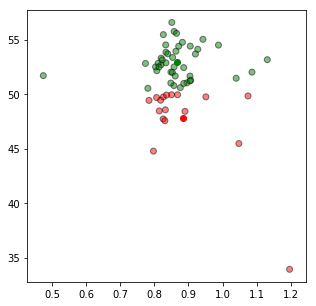

In [9]:
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], color=list(colors), alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
#plt.xlim(0, 80) 
#plt.ylim(0, 80)
plt.show()

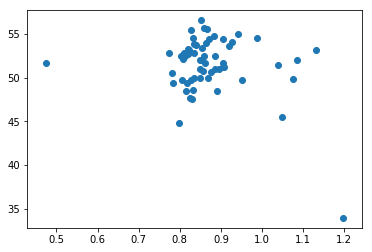

In [10]:
plt.scatter(df['x'],df['y'])